Dados conseguidos em: https://www.kaggle.com/nathanlauga/nba-games/discussion/215742

Um arquivo em zip foi baixado e extraído 5 dataframes deste.

Temporadas de 2002 a 2020

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go

In [2]:
# Leitura dos Dados
df_jogos = pd.read_csv('games.csv')
df_detalhesJogos = pd.read_csv('games_details.csv')
df_jogadores = pd.read_csv('players.csv')
df_ranking = pd.read_csv('ranking.csv')
df_times = pd.read_csv('teams.csv')

## Leitura dos DataSets Brutos

In [3]:
df_jogos.head(10)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,...,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,0.739,...,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,0.774,...,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,0.955,...,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,0.933,...,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0
5,2021-05-25,42000172,Final,1610612746,1610612742,2020,1610612746,121.0,0.536,0.900,...,23.0,39.0,1610612742,127.0,0.585,0.542,0.529,25.0,34.0,0
6,2021-05-24,42000122,Final,1610612749,1610612748,2020,1610612749,132.0,0.489,0.900,...,34.0,61.0,1610612748,98.0,0.402,0.686,0.286,20.0,36.0,1
7,2021-05-24,42000162,Final,1610612743,1610612757,2020,1610612743,128.0,0.535,0.800,...,29.0,35.0,1610612757,109.0,0.479,0.821,0.485,15.0,40.0,1
8,2021-05-23,42000101,Final,1610612755,1610612764,2020,1610612755,125.0,0.495,0.697,...,27.0,40.0,1610612764,118.0,0.557,0.800,0.400,26.0,41.0,1
9,2021-05-23,42000151,Final,1610612756,1610612747,2020,1610612756,99.0,0.465,0.833,...,24.0,47.0,1610612747,90.0,0.434,0.607,0.269,19.0,33.0,1


In [4]:
df_jogadores.head(10)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
5,Joe Ingles,1610612762,204060,2019
6,Ed Davis,1610612762,202334,2019
7,Jeff Green,1610612762,201145,2019
8,Dante Exum,1610612762,203957,2019
9,Emmanuel Mudiay,1610612762,1626144,2019


In [5]:
df_ranking.head(10)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612762,0,22020,2021-05-26,West,Utah,72,52,20,0.722,31-5,21-15,NaN
1,1610612756,0,22020,2021-05-26,West,Phoenix,72,51,21,0.708,27-9,24-12,NaN
2,1610612743,0,22020,2021-05-26,West,Denver,72,47,25,0.653,25-11,22-14,NaN
3,1610612746,0,22020,2021-05-26,West,LA Clippers,72,47,25,0.653,26-10,21-15,NaN
4,1610612742,0,22020,2021-05-26,West,Dallas,72,42,30,0.583,21-15,21-15,NaN
5,1610612747,0,22020,2021-05-26,West,L.A. Lakers,72,42,30,0.583,21-15,21-15,NaN
6,1610612757,0,22020,2021-05-26,West,Portland,72,42,30,0.583,20-16,22-14,NaN
7,1610612744,0,22020,2021-05-26,West,Golden State,72,39,33,0.542,25-11,14-22,NaN
8,1610612763,0,22020,2021-05-26,West,Memphis,72,38,34,0.528,18-18,20-16,NaN
9,1610612759,0,22020,2021-05-26,West,San Antonio,72,33,39,0.458,14-22,19-17,NaN


In [6]:
df_times.head(10)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [7]:
df_detalhesJogos.head(10)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36,14.0,...,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50,4.0,...,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,3.0,...,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,2.0,...,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07,2.0,...,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0
5,42000102,1610612764,WAS,Washington,202722,Davis Bertans,NaN,NaN,23:43,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,-11.0
6,42000102,1610612764,WAS,Washington,202397,Ish Smith,NaN,NaN,23:20,5.0,...,0.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,10.0,-10.0
7,42000102,1610612764,WAS,Washington,1629655,Daniel Gafford,NaN,NaN,20:00,3.0,...,4.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,11.0,-1.0
8,42000102,1610612764,WAS,Washington,1628990,Chandler Hutchison,NaN,NaN,16:29,1.0,...,0.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,4.0,-17.0
9,42000102,1610612764,WAS,Washington,201577,Robin Lopez,NaN,NaN,10:15,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,-12.0


## Filtragem de Dados

In [8]:
# Remover Colunas que não serão utilizadas
df_ranking = df_ranking.drop(["LEAGUE_ID", "TEAM_ID"], axis=1)

In [9]:
 # Pegar as IDs dos times e seus nomes
ids_times = df_times[['TEAM_ID','ABBREVIATION']].drop_duplicates()
#Trocar as IDs dos times por suas abreviações
dicionario_idsTimes = {row["TEAM_ID"]: row["ABBREVIATION"] for index, row in ids_times.iterrows()} 

In [10]:

for col in ["HOME_TEAM_ID", "VISITOR_TEAM_ID"]:
    df_jogos[col] = df_jogos[col].replace(dicionario_idsTimes)

In [11]:
# remover os jogadores que tem menos de 10 jogos
df_detalhesJogos = df_detalhesJogos[df_detalhesJogos.groupby('PLAYER_NAME').PLAYER_NAME.transform('count') > 10]

In [12]:
# Ordenar os jogos por temporada
df_jogos = df_jogos.sort_values('SEASON')

### MVP TOTAL - Média Ponderada Total

In [13]:
pts = 10
ast = 12
reb = 15
stl = 20
blk = 20
to = -10
soma = pts + ast + reb + stl + blk + to
media_geral = ((((df_detalhesJogos.groupby(['PLAYER_NAME'])['PTS'].mean())*pts) + ((
    df_detalhesJogos.groupby(['PLAYER_NAME'])['AST'].mean())*ast) + ((
    df_detalhesJogos.groupby(['PLAYER_NAME'])['REB'].mean())*reb) + ((
    df_detalhesJogos.groupby(['PLAYER_NAME'])['STL'].mean())*stl) + ((
    df_detalhesJogos.groupby(['PLAYER_NAME'])['BLK'].mean())*blk) + ((
    df_detalhesJogos.groupby(['PLAYER_NAME'])['TO'].mean())*to)) / soma).sort_values(ascending = False)
media_geral = pd.DataFrame(data = media_geral.head(30))

In [42]:
media_geral.head(15)

,0
PLAYER_NAME,
LeBron James,7.160197
Anthony Davis,6.980276
Luka Doncic,6.852985
Joel Embiid,6.817694
Karl-Anthony Towns,6.670153
Russell Westbrook,6.507760
Kevin Durant,6.503920
Giannis Antetokounmpo,6.254951
Nikola Jokic,6.132147


<AxesSubplot:xlabel='PLAYER_NAME'>

<Figure size 1080x540 with 0 Axes>

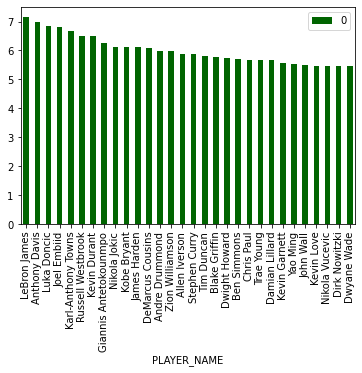

In [14]:
fig = plt.figure(figsize = (15,7.5))
media_geral.plot(kind='bar', color = 'DarkGreen')

# Muita gente nova, porquê?

In [15]:
df_jogosptshome = df_jogos.groupby('SEASON')[['PTS_home','AST_home','REB_home']].mean()
df_jogosptsaway = df_jogos.groupby('SEASON')[['PTS_away','AST_away','REB_away']].mean()

In [16]:
df_jogosptshome

,PTS_home,AST_home,REB_home
SEASON,,,
2003,94.907465,22.056765,43.173406
2004,98.604993,21.928781,42.533040
2005,98.406425,21.152235,41.799581
2006,99.849190,22.004933,41.609584
2007,101.273565,22.496811,42.702339
2008,100.922807,21.588070,41.960000
2009,101.654494,21.884831,42.205758
2010,100.756681,21.976090,41.908579
2011,97.392210,21.380435,42.860507


In [17]:
df_jogosptsaway

,PTS_away,AST_away,REB_away
SEASON,,,
2003,91.092535,20.262053,41.241058
2004,95.381791,20.240088,41.000000
2005,95.172486,19.689944,39.972067
2006,96.944327,20.223397,40.442565
2007,97.549256,20.579022,41.146704
2008,97.903860,20.002105,40.530526
2009,98.745787,20.259831,41.030899
2010,97.384669,20.533052,40.860759
2011,94.429348,20.115036,41.421196


### Ranking Plus Minus

<AxesSubplot:xlabel='PLAYER_NAME'>

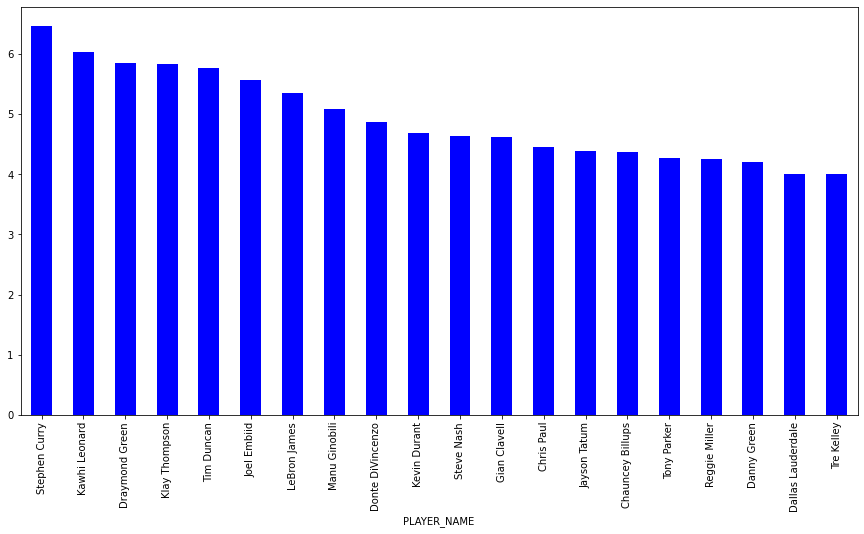

In [18]:
df_plusminus = (df_detalhesJogos.groupby(['PLAYER_NAME'])['PLUS_MINUS'].mean().sort_values(ascending= False)).head(20)
fig = plt.figure(figsize = (15,7.5))
df_plusminus.plot(kind='bar', color='b')


### Ranking baseado na porcetagem de W/G

In [19]:
# Fazendo um data frame filtrado onde ele contem todas as temporadas e a colocação dos times 
df_ranking2020 = df_ranking[df_ranking.STANDINGSDATE == '2021-05-26'].sort_values('W_PCT', ascending = False)

In [20]:
df_ranking2011 = df_ranking[df_ranking.STANDINGSDATE == '2012-10-04'].sort_values('W_PCT', ascending = False)

In [21]:
df_overallrank = df_ranking[df_ranking.G == 82].sort_values(['SEASON_ID', 'W_PCT'], ascending = False)

In [22]:
df_ranking2019 = df_ranking[df_ranking.STANDINGSDATE == '2020-08-15'].sort_values('W_PCT', ascending = False)

In [23]:
df_rankingTotal = pd.merge(df_ranking2020,df_ranking2019, how = 'outer')
df_rankingTotal = pd.merge(df_rankingTotal,df_overallrank,how = 'outer')
df_rankingTotal = pd.merge(df_rankingTotal,df_ranking2011,how = 'outer')

In [24]:
df_rankingTotal = df_rankingTotal.drop(['STANDINGSDATE','RETURNTOPLAY','ROAD_RECORD', 'HOME_RECORD'],axis =1).drop_duplicates()

In [25]:
df_rankingTotal = df_rankingTotal.sort_values(['SEASON_ID','W_PCT'],ascending = False)

In [26]:
# Mudança formato SEASON_ID
df_rankingTotal.SEASON_ID = df_rankingTotal.SEASON_ID.astype('string')
df_rankingTotal['SEASON_ID'] = df_rankingTotal['SEASON_ID'].map(lambda x: x.lstrip('2'))
df_rankingTotal['SEASON_ID'] = df_rankingTotal['SEASON_ID'].map(lambda x: x.lstrip('0'))
df_rankingTotal.SEASON_ID = df_rankingTotal.SEASON_ID.astype('int')

In [27]:
df_rankingTotal.head(31)

,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT
0,20,West,Utah,72,52,20,0.722
1,20,West,Phoenix,72,51,21,0.708
2,20,East,Philadelphia,72,49,23,0.681
3,20,East,Brooklyn,72,48,24,0.667
4,20,West,Denver,72,47,25,0.653
5,20,West,LA Clippers,72,47,25,0.653
6,20,East,Milwaukee,72,46,26,0.639
7,20,West,Portland,72,42,30,0.583
8,20,West,L.A. Lakers,72,42,30,0.583
9,20,West,Dallas,72,42,30,0.583


In [35]:
# Filtrando Por temporada e posições
seasons = []
for y in range(20,1,-1):
    season = (df_rankingTotal[df_rankingTotal.SEASON_ID== y]).reset_index()
    season = season.drop('index', axis = 1)
    seasons.append(season)
for i in seasons:
    print(i)

    SEASON_ID CONFERENCE           TEAM   G   W   L  W_PCT
0          20       West           Utah  72  52  20  0.722
1          20       West        Phoenix  72  51  21  0.708
2          20       East   Philadelphia  72  49  23  0.681
3          20       East       Brooklyn  72  48  24  0.667
4          20       West         Denver  72  47  25  0.653
5          20       West    LA Clippers  72  47  25  0.653
6          20       East      Milwaukee  72  46  26  0.639
7          20       West       Portland  72  42  30  0.583
8          20       West    L.A. Lakers  72  42  30  0.583
9          20       West         Dallas  72  42  30  0.583
10         20       East       New York  72  41  31  0.569
11         20       East        Atlanta  72  41  31  0.569
12         20       East          Miami  72  40  32  0.556
13         20       West   Golden State  72  39  33  0.542
14         20       West        Memphis  72  38  34  0.528
15         20       East         Boston  72  36  36  0.5

    SEASON_ID CONFERENCE           TEAM   G   W   L  W_PCT
0          13       West    San Antonio  82  62  20  0.756
1          13       West  Oklahoma City  82  59  23  0.720
2          13       West  L.A. Clippers  82  57  25  0.695
3          13       East        Indiana  82  56  26  0.683
4          13       West        Houston  82  54  28  0.659
5          13       West       Portland  82  54  28  0.659
6          13       East          Miami  82  54  28  0.659
7          13       West   Golden State  82  51  31  0.622
8          13       West        Memphis  82  50  32  0.610
9          13       West         Dallas  82  49  33  0.598
10         13       West        Phoenix  82  48  34  0.585
11         13       East        Chicago  82  48  34  0.585
12         13       East        Toronto  82  48  34  0.585
13         13       East       Brooklyn  82  44  38  0.537
14         13       East     Washington  82  44  38  0.537
15         13       East      Charlotte  82  43  39  0.5

    SEASON_ID CONFERENCE           TEAM   G   W   L  W_PCT
0           2       West         Dallas  82  60  22  0.732
1           2       West    San Antonio  82  60  22  0.732
2           2       West     Sacramento  82  59  23  0.720
3           2       West      Minnesota  82  51  31  0.622
4           2       West    L.A. Lakers  82  50  32  0.610
5           2       West       Portland  82  50  32  0.610
6           2       East        Detroit  82  50  32  0.610
7           2       East     New Jersey  82  49  33  0.598
8           2       East        Indiana  82  48  34  0.585
9           2       East   Philadelphia  82  48  34  0.585
10          2       West           Utah  82  47  35  0.573
11          2       East    New Orleans  82  47  35  0.573
12          2       West        Phoenix  82  44  38  0.537
13          2       East         Boston  82  44  38  0.537
14          2       West        Houston  82  43  39  0.524
15          2       East      Milwaukee  82  42  40  0.5

In [36]:
# Pegando todos os Times
times = []
for i in df_ranking2020.TEAM:
    times.append(i)

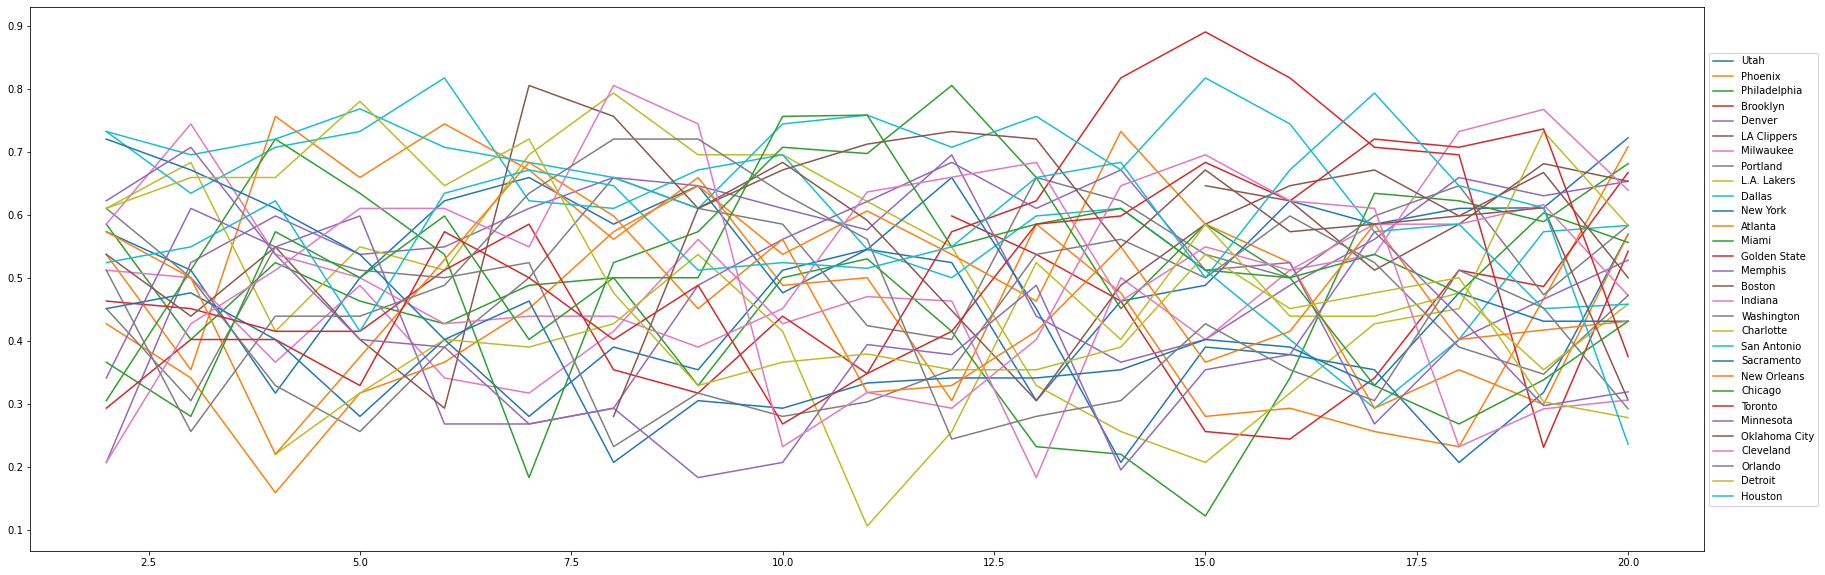

In [37]:
figsize = (30,10)
fig = plt.figure(figsize=figsize)
for i in times:
    plt.plot(df_rankingTotal[df_rankingTotal.TEAM == i]['SEASON_ID'], 
         df_rankingTotal[df_rankingTotal.TEAM == i]['W_PCT'], label= i)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()


In [38]:
trace = go.Scatter(x = df_rankingTotal['TEAM'],
                   y = df_rankingTotal['W_PCT'],
                   mode = 'markers')
data = [trace]
py.iplot(data)

In [39]:
for i in sorted(times):
    layout = go.Layout(title= i,
                   yaxis={'title':'% de Vitoria'},
                   xaxis={'title': 'Temporada'})
    trace = go.Scatter(x = df_rankingTotal[df_rankingTotal.TEAM == i]['SEASON_ID'],
                       y = df_rankingTotal[df_rankingTotal.TEAM == i]['W_PCT'],
                       mode = 'markers')
    data = [trace]
    # Criando figura que será exibida
    fig = go.Figure(data=data, layout=layout)
    # Exibindo figura/gráfico
    py.iplot(fig)


In [40]:
dominant = df_rankingTotal.groupby('TEAM')['W_PCT'].mean().sort_values(ascending = False)

<AxesSubplot:xlabel='TEAM'>

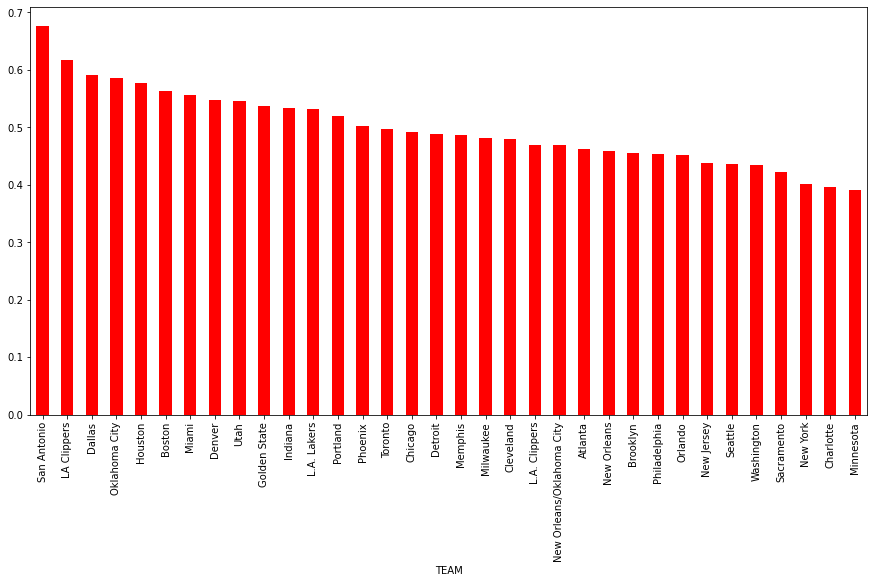

In [41]:
fig = plt.figure(figsize = (15,7.5)) 
dominant.plot(kind='bar', color='r')